In [1]:
#Small Image Classification Using Convolutional Neural Network (CNN)

In [2]:
'''
In this notebook, we will classify small images in cifar10 dataset from tensorflow keras datasets.
There are total 10 classes in this dataset. We will use CNN for classification
ie , classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
'''

'\nIn this notebook, we will classify small images in cifar10 dataset from tensorflow keras datasets.\nThere are total 10 classes in this dataset. We will use CNN for classification\nie , classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]\n'

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the dataset
# datasets.cifar10.load_data() this will return 4 vaiables X_train, y_train, X_test,y_test

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
# training samples are 50000, each sample is 32X32 image, and have RGB channels - 3

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 224s 1us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# Here we see there are 50000 training images and 10000 test images

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [55]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [56]:
classes[6]

'frog'

In [59]:
# of all the classes in y_train data, show me 2nd sample
classes[y_train[0]]

'frog'

In [ ]:
# Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2)) # image size setting
    plt.imshow(X[index]) # (X_train[0])
    plt.xlabel(classes[y[index]]) # just for printing the label

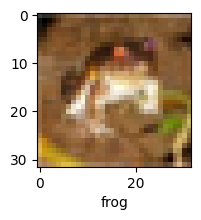

In [43]:
# for every index we pass, we get different images.
# we pass X_train and y_train (ie, training data) to plot it
plot_sample(X_train, y_train, 0)

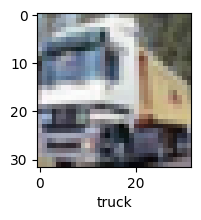

In [17]:
plot_sample(X_train, y_train, 1)

In [18]:
# Normalize the images to a number from 0 to 1. 
# Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
# Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
# Normalizing and scaling the training data and test data to range between 0 and 1

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
# Build simple artificial neural network for image classification

In [22]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 30ms/step - accuracy: 0.3531 - loss: 1.8123
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4271 - loss: 1.6226
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4550 - loss: 1.5426
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4784 - loss: 1.4810
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4975 - loss: 1.4304


In [23]:
# You can see that at the end of 5 epochs, accuracy is at around 49%

In [60]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4684 - loss: 1.5012


[1.50117027759552, 0.4684000015258789]

In [ ]:
# evaluating test data also gives us less accuracy, ie, 0.4684000015258789

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))
# this classification report gives reports for every classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.50      0.48      1000
           1       0.58      0.62      0.59      1000
           2       0.45      0.20      0.28      1000
           3       0.40      0.20      0.26      1000
           4       0.42      0.48      0.44      1000
           5       0.40      0.38      0.39      1000
           6       0.56      0.51      0.53      1000
           7       0.57      0.52      0.55      1000
           8       0.38      0.83      0.52      1000
           9       0.53      0.47      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000



In [25]:
# Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), #convoultion and relu layer
    layers.MaxPooling2D((2, 2)), # pooling layer
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
'''
cnn = models.Sequential([
models.Sequential means layers are stacked one after another

First Convolution Layer | layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
Conv2D → convolution layer (used for images) | filters=32 → the model learns 32 different feature detectors (the number 32 is assigned randomly)
kernel_size=(3, 3) → each filter looks at a 3×3 pixel area (basically setting up filter area)
input_shape=(32, 32, 3) →image width = 32 pixels | image height = 32 pixels | 3 channels = RGB (color image) | This is only written in the first layer so the model knows the input size.

Max Pooling Layer | layers.MaxPooling2D((2, 2)), | Reduces the image size | Takes the maximum value from each 2×2 block | prevent overfitting | Think of it as shrinking the image but keeping important info
Second Convolution Layer | layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), | Another feature-detecting layer | filters=64 → learns more complex patterns | No input_shape needed (Keras already knows) | Early layers learn edges, later layers learn shapes & objects

Second Max Pooling Layer
layers.MaxPooling2D((2, 2)), | Again reduces size | Keeps important features only

Flatten Layer
layers.Flatten(), |Converts the 2D feature maps into a 1D vector | Needed before sending data to Dense layers

Dense (Fully Connected) Layer | layers.Dense(64, activation='relu'), | Normal neural network layer | 64 neurons has hidden layer

Output Layer | layers.Dense(10, activation='softmax') | 10 → number of classes (e.g., 10 object categories)

In Simple Words
CNN looks at images
Finds edges → shapes → patterns
Shrinks data to focus on important features
Makes a final decision using probabilities
'''


In [28]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.4793 - loss: 1.4501
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6134 - loss: 1.1032
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6606 - loss: 0.9801
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6868 - loss: 0.8996
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7089 - loss: 0.8388
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7308 - loss: 0.7827
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7443 - loss: 0.7338
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7616 - loss: 0.6875
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7754 - loss: 0.6474
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7905 - loss: 0.6044


In [ ]:
'''With CNN, at the end 5 epochs, accuracy was at around 79% which is a significant improvement over ANN. 
CNN's are best for image classification and gives superb accuracy. Also computation is much less compared 
to simple ANN as maxpooling reduces the image dimensions while still preserving the features'''

"With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. \nCNN's are best for image classification and gives superb accuracy. Also computation is much less compared \nto simple ANN as maxpooling reduces the image dimensions while still preserving the features"

In [ ]:
cnn.evaluate(X_test,y_test)
#on test data also we are getting 70% accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7082 - loss: 0.8957


[0.8956593871116638, 0.7081999778747559]

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[1.48836859e-02, 4.51896223e-04, 6.67260215e-03, 7.18665540e-01,
        1.62427372e-04, 1.79709479e-01, 2.78631039e-02, 9.46404616e-05,
        5.11697792e-02, 3.26762383e-04],
       [7.26430590e-05, 1.85021758e-02, 1.48541531e-07, 8.21033339e-08,
        1.36221718e-08, 7.50112772e-09, 6.22536744e-10, 4.77151154e-08,
        9.80607152e-01, 8.17835564e-04],
       [3.51705812e-02, 2.29586154e-01, 2.66970671e-03, 2.22659786e-03,
        3.58228642e-03, 6.25943765e-04, 1.45102653e-03, 3.61517025e-03,
        7.01547861e-01, 1.95246395e-02],
       [9.54326808e-01, 1.20510103e-03, 2.05536261e-02, 6.58936740e-04,
        3.79331363e-03, 2.66058869e-05, 4.51330375e-03, 2.68642791e-04,
        1.45453075e-02, 1.08339329e-04],
       [1.18428829e-06, 9.11848383e-06, 1.99218262e-02, 8.80827755e-03,
        5.34320712e-01, 7.66713731e-03, 4.29265440e-01, 4.33362857e-06,
        1.49408868e-06, 4.83556562e-07]], dtype=float32)

In [ ]:
np.argmax([5, 12, 1, 2])
# argmax returns index of max element , ie index of 12 is 1

np.int64(1)

In [65]:
np.argmax(y_pred[0])

np.int64(3)

In [ ]:
#returns the index of max element in y_pred
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5] # y_predicted

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5] #y_test
# comparing y_predicted and y_test, they are almost similar - last element, it is making a mistake, but model can make mistakes.

array([3, 8, 8, 0, 6], dtype=uint8)

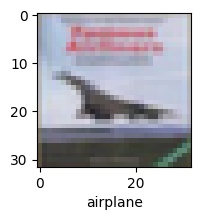

In [71]:
plot_sample(X_test, y_test,3)

In [ ]:
# it predicted correct
classes[y_classes[3]]

'airplane'

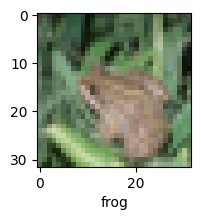

In [73]:
plot_sample(X_test, y_test,4)

In [ ]:
classes[y_classes[3]]
# this elementy is actually a frog, but model says its an airplane, which is a mistake

'airplane'